In [2]:
#Imports

#Pandas: Reading and analyzing data
import pandas as pd
#Numerical calcuations
import numpy as np
#statistical data visualization
import seaborn as sns
#Use Dates in Datetime Format
import datetime

#Normalization
from sklearn.preprocessing import MinMaxScaler
#Standardization
from sklearn.preprocessing import StandardScaler
#Evaluate models
import math
#Evaluate MSE
from sklearn.metrics import mean_squared_error
#plot numpy array
import matplotlib.pyplot as plt
#Create Folder for modelling checkpoint
import os
#Tensorflow
import tensorflow as tf

# Data - Collection and preprocessing

33


,temp,rhum,0101-ZE01-70,0101-ZE01-74,0141-ZE01-70,0141-ZE01-74,0145-ZE02-70,0213-ZE01-71,0223-ZE01-71,0223-ZE02-71,...,0353-ZE03-70,0404-ZE01-70,0430-ZE01-70,0439-ZE01-70,0439-ZE01-72,0439-ZE02-70,5311-ZE01-70,6907-ZE01-74,hour,dayofweek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,5.3,97.0,0.0,42.72,15.11844,15.11844,11.008,0.0,0.0,31.65,...,19.398,22.07784,0.0,0.0,0.0,13.36,0.0,3.87,0,1


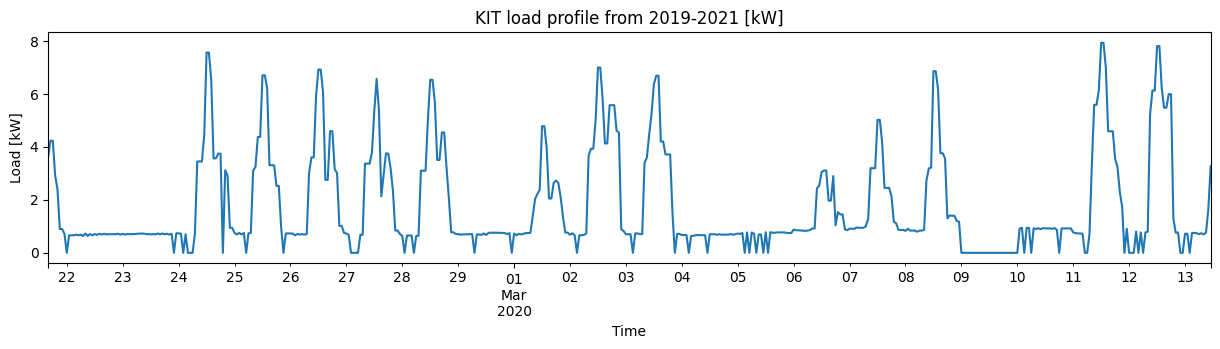

In [5]:
#Get Data

#Get Data

# get current working directory and go back one folder to main working directory
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
# set path to load data file
load_data_path = '/data/d02_data_cleaned/d02_data_cleaned.csv'
path = cwd + load_data_path
  
#Read CSV file to pandas dataframe; encoding= 'unicode_escape': Decode from Latin-1 source code. Default UTF-8.
df = pd.read_csv(path, encoding= 'unicode_escape', index_col='Date')
df.index = pd.to_datetime(df.index)
df_feature = df.copy()

#Drop columns with insignificant weather features
df.drop(columns=['prcp', 'wdir','pres', 'coco','dwpt', 'wpgt','wspd'], axis=1, inplace=True)
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek

smart_meter_names = df.columns[2:-2]
print(len(smart_meter_names))

#Visualize
df['0213-ZE01-71'][10000:10500].plot(title="KIT load profile from 2019-2021 [kW]",
             figsize=(15,3), 
             xlabel="Time", 
             ylabel="Load [kW]",
             kind="line"
            )
# list(data) or
#display(df.describe().transpose())
#display(df)
list(df.columns)
df.head(1)

# Feature Engineering

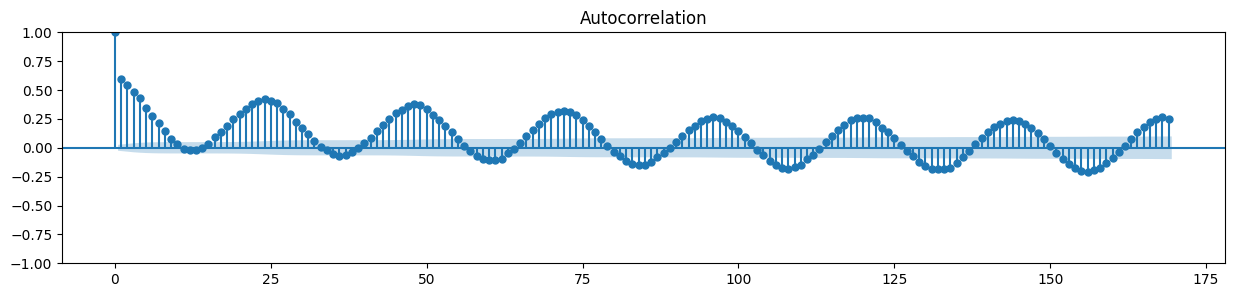

In [3]:
f, ax = plt.subplots(figsize=(15, 3))
autocorrelation = sm.graphics.tsa.plot_acf(df['0101-ZE01-70'][:10000].values, lags=169, alpha=0.01, ax=ax)

#n_past = 24

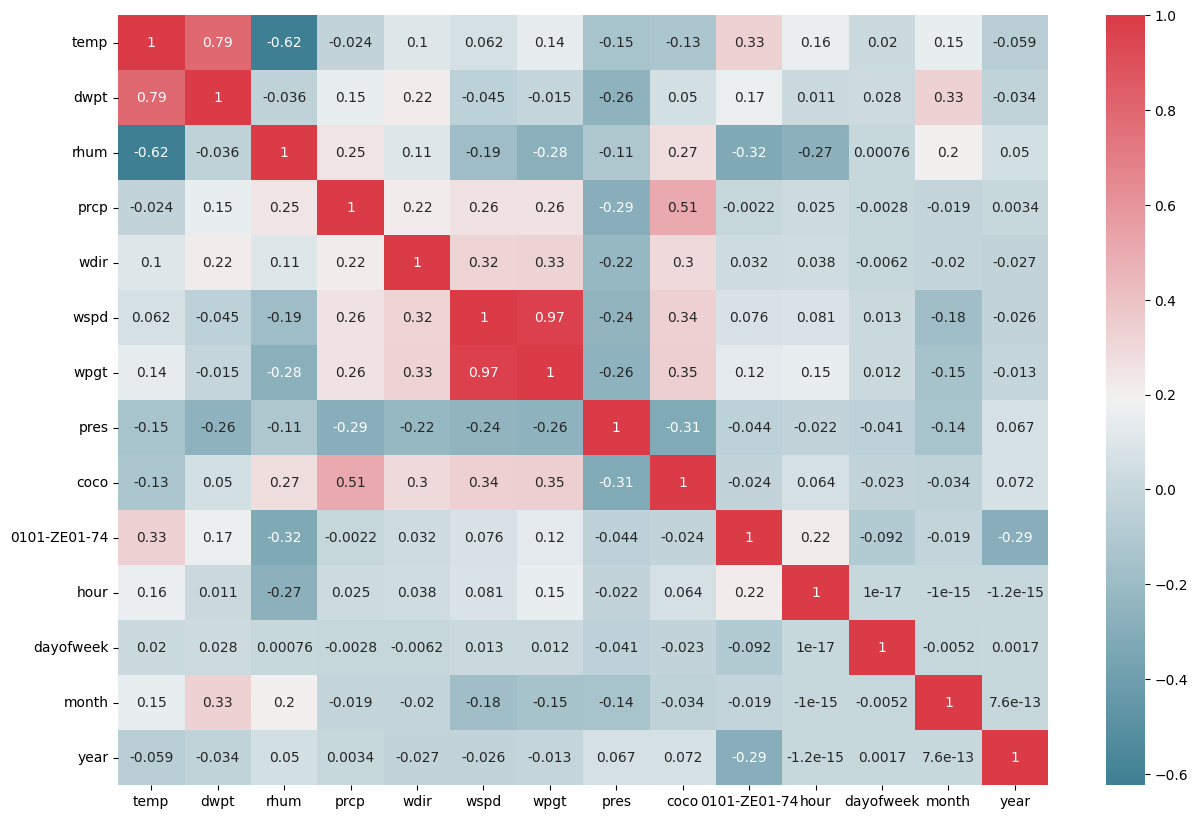

In [4]:
#1.4 Features - Generation, selection, extraction, engineering

"""
Selected Features: Temperature, rhum, hour, dayofweek
"""

try: 
    #Create features
    df_feature['hour'] = df_feature.index.hour
    df_feature['dayofweek'] = df_feature.index.dayofweek
    #df_feature['quarter'] = df_feature.index.quarter
    df_feature['month'] = df_feature.index.month
    df_feature['year'] = df_feature.index.year
    #df_feature['dayofyear'] = df_feature.index.dayofyear
    #df_feature['dayofmonth'] = df_feature.index.day
    #df_feature['weekofyear'] = df_feature.index.isocalendar().week.astype('int64')
    df_feature['temp'] = df_feature.temp
    df_feature['dwpt'] = df_feature.dwpt
    df_feature['rhum'] = df_feature.rhum
    df_feature['prcp'] = df_feature.prcp
    #df_feature['wdir'] = df_feature.wdir
    #df_feature['wspd'] = df_feature.wspd
    #df_feature['wpgt'] = df_feature.wpgt
    #df_feature['pres'] = df_feature.pres
    df_feature['coco'] = df_feature.coco

    df_feature.drop(columns=[
        '0101-ZE01-70','0141-ZE01-70',
        '0141-ZE01-74', '0145-ZE02-70', '0223-ZE01-71','0232-ZE01-71', '0242-ZE01-70', '0242-ZE01-74',
        '0243-ZE01-70', '0245-ZE01-70', '0301-ZE01-70', '0301-ZE01-74', '0301-ZE02-70', '0301-ZE02-74', '0301-ZE03-70',
        '0301-ZE03-74', '0310-ZE01-70', '0330-ZE01-74', '0330-ZE02-70', '0330-ZE03-70', '0353-ZE01-70',
        '0353-ZE03-70', '0404-ZE01-70', '0430-ZE01-70', '0439-ZE01-70', '0439-ZE01-72', '0439-ZE02-70', '5311-ZE01-70',
        '0223-ZE02-71','0303-ZE01-70', '0213-ZE01-71', '6907-ZE01-74'
    ], axis=1, inplace=True)


    FEATURES = [
        # 'dayofyear', 'quarter', 'dayofmonth', 'weekofyear', "wdir", "wspd", "wpgt", "coco", 
        'hour', 'dayofweek', 'month', 'year', "temp", "dwpt", "rhum", "prcp","coco"
    ]
    TARGET = ['0101-ZE01-74',
              #'0223-ZE02-71','0303-ZE01-70', '0213-ZE01-71', '6907-ZE01-74'
             ]


    #Feature selection
    # run correlation matrix and plot
    f, ax = plt.subplots(figsize=(15, 10))
    #Compute pairwise correlation of columns, excluding NA/null values.
    corr = df_feature.corr(method="pearson")
    #Plot heatmap, use _ to hide instance output
    #
    _ = sns.heatmap(data=corr, 
                cmap=sns.diverging_palette(220, 10, as_cmap=True), #color map
                square=False, 
                annot=True
               )
except:
    print("Allready executed")

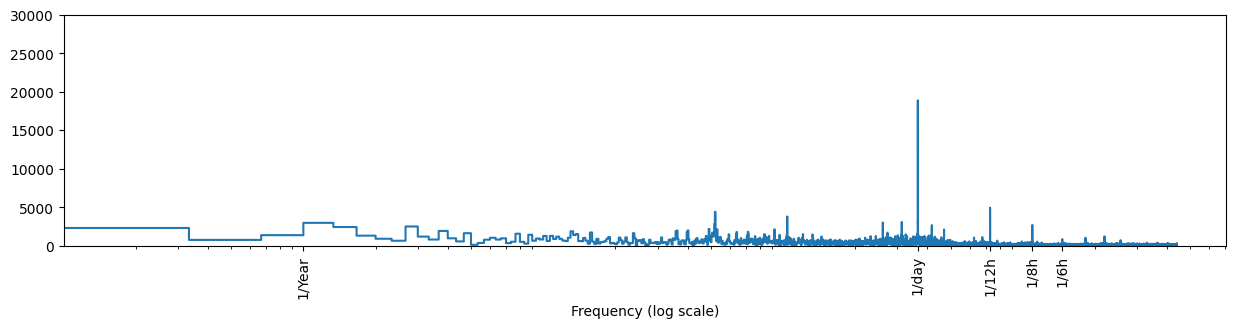

In [5]:
"""
Fourier Transform is probably the most well known algorithm for feature extraction 
from time-dependent data (in particular speech data), where frequency holds a great deal of information.

Fourier analysis is the process of obtaining the spectrum of frequencies H(f) comprising a time-series h(t) 
and it is realized by the Fourier Transform (FT). 

In the time-series data, seasonality is the presence of some certain regular intervals that predictably cycle 
on the specific time frame (i.e. weekly basis, monthly basis). Decomposing seasonal components from 
time-series data can improve forecasting accuracy.

There are many approaches to detect seasonality in time series, such as classical decomposition and 
seasonal extraction in ARIMA. We will use Fast Fourier Transform (FFT) to find the period of 
dominating seasonal components of time series.

"""
fft = tf.signal.rfft(df['0213-ZE01-71'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['0213-ZE01-71'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(15, 3))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 30000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524,365.2524*2,365.2524*3,365.2524*4], labels=['1/Year', '1/day','1/12h','1/8h','1/6h'],rotation=90)
_ = plt.xlabel('Frequency (log scale)')

In [6]:
#Convert Time String to seconds
date_time = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(pd.Timestamp.timestamp)

#Sine cosine Scaling
hour = 60*60
df['hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))
df.drop('hour', axis=1, inplace=True)

daysinweek = 7*24*60*60
df['dayofweek sin'] = np.sin(timestamp_s * (2 * np.pi / daysinweek))
df['dayofweek cos'] = np.cos(timestamp_s * (2 * np.pi / daysinweek))
df.drop('dayofweek', axis=1, inplace=True)

#Min Max Sclaing
col_names = df.columns
features = df[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
df = pd.DataFrame(features, columns = col_names, index=df.index)
df.head()

,temp,rhum,0101-ZE01-70,0101-ZE01-74,0141-ZE01-70,0141-ZE01-74,0145-ZE02-70,0213-ZE01-71,0223-ZE01-71,0223-ZE02-71,...,0430-ZE01-70,0439-ZE01-70,0439-ZE01-72,0439-ZE02-70,5311-ZE01-70,6907-ZE01-74,hour sin,hour cos,dayofweek sin,dayofweek cos
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.325866,0.963855,0.0,0.221036,0.164777,0.164777,0.055199,0.000000,0.000000,0.324802,...,0.000000,0.000000,0.0,0.286572,0.00000,0.202830,0.692833,0.0,0.012536,0.388740
2019-01-01 01:00:00,0.323829,0.963855,0.0,0.000000,0.165214,0.165214,0.000000,0.000000,0.413548,0.305612,...,0.000000,0.605169,0.0,0.000000,0.00000,0.200210,0.172013,0.0,0.008717,0.407044
2019-01-01 02:00:00,0.321792,0.963855,0.0,0.221408,0.000000,0.165214,0.000000,0.052005,0.412001,0.305612,...,0.068006,0.607521,0.0,0.283569,0.00000,0.202830,0.648896,0.0,0.005585,0.425479
2019-01-01 03:00:00,0.319756,0.963855,0.0,0.221160,0.165214,0.173931,0.000000,0.000000,0.412001,0.298941,...,0.000000,0.605169,0.0,0.286572,0.62129,0.205451,0.128077,0.0,0.003144,0.444018
2019-01-01 04:00:00,0.319756,0.951807,0.0,0.000000,0.173931,0.175240,0.000000,0.051110,0.412001,0.296171,...,0.000000,0.000000,0.0,0.287001,0.00000,0.206499,0.604959,0.0,0.001398,0.462635
